# Basics of cluster analysis

## Hierarchy
Cf. https://docs.scipy.org/doc/scipy/reference/cluster.html

The `hierarchy` module provides functions for hierarchical and agglomerative clustering. Its features include generating hierarchical clusters from distance matrices, calculating statistics on clusters, cutting linkages to generate flat clusters, and visualizing clusters with dendrograms.

Clustering algorithms are useful in information theory, target detection, communications, compression, and other areas. The `vq` module only supports vector quantization and the k-means algorithms.

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns

`linkage`: Perform hierarchical/agglomerative clustering.

`fcluster`: Form flat clusters from the hierarchical clustering defined by the given linkage matrix.

In [2]:
x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]

y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,
                   'y_coordinate': y_coordinates})

In [3]:
display(df)

,x_coordinate,y_coordinate
0,80.1,87.2
1,93.1,96.1
2,86.6,95.6
3,98.5,92.4
4,86.4,92.4
5,9.5,57.7
6,15.2,49.4
7,3.4,47.3
8,10.4,59.1
9,20.3,55.5


In [4]:
# The linkage method computes distances between intermediate clusters
z = linkage(y=df, method="ward")

# The fcluster method generates clusters and assigns associated cluster 
# labels to a new column in the DataFrame
df["cluster_labels_hierarchy"] = fcluster(Z=z, t=3, criterion="maxclust")

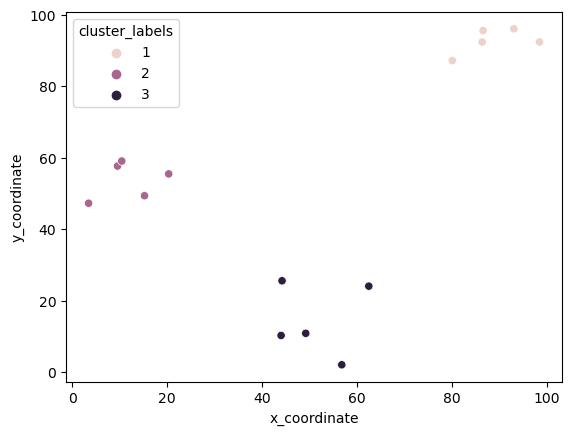

In [6]:
sns.scatterplot(x="x_coordinate", y="y_coordinate", hue="cluster_labels_hierarchy", data=df)
plt.show()

## K-means

In [8]:
from scipy.cluster.vq import kmeans, vq
import random

In [9]:
random.seed(1_000, 2_000)

In [10]:
# Compute cluster centers by defining 3 clusters
centroids, _ = kmeans(df, k_or_guess=3)

df["cluster_labels_kmeans"], _ =vq(obs=df, code_book=centroids)

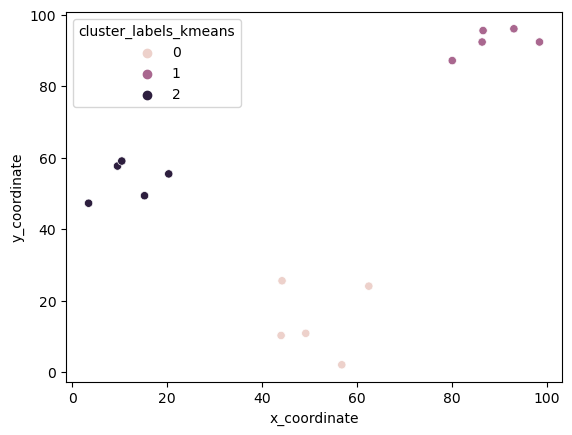

In [11]:
sns.scatterplot(x="x_coordinate", y="y_coordinate", hue="cluster_labels_kmeans", data=df)
plt.show()

## Normalization
This is the process of rescaling data to a standard deviation of 1, i.e., `x_norm = x / std_dev(x)`.

In [15]:
from scipy.cluster.vq import whiten

In [13]:
data: np.ndarray = np.random.randint(0, 100, size=10)
print(data)

[11 32 75 95 83 40 93 71 13 20]


In [16]:
# Transform the data
scaled_data: np.ndarray = whiten(data)
print(scaled_data)

[0.3455414  1.00521135 2.35596411 2.98422121 2.60726695 1.25651419
 2.9213955  2.23031269 0.40836711 0.6282571 ]


Note that we use a one dimensional array. In case of a multidimensional array, `whiten` divides each value by the standard deviation of the column.

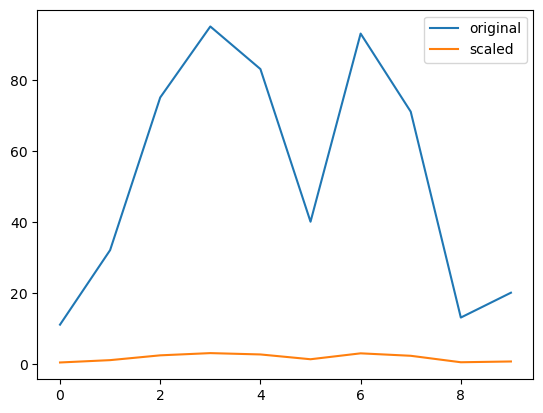

In [18]:
plt.plot(data, label="original")
plt.plot(scaled_data, label="scaled")
plt.legend()
plt.show()